## Introduction 

This is an Exploratory Data Analysis of my fitbit data (3 months of data). The main idea behind this project was to look at the fitbit data on a much deeper level and see if I can leverage the insights to better my health. These were a few questions I had in mind when starting the analysis:

* How does my activity levels look like when my sleep efficiency is better than normal days?
* How does my calorie burn change throughout the week?
* Which factors contribute the most to a higher sleep efficiency score?
* How often does my Resting Heart Beat fluctuate? What causes these fluctuations? etc..
    


To find out how I extracted the data using the Fitbit API, refer to this:

**[Fitbit Data Wrapper](https://github.com/Arnab-Rajkhowa/Fitbit-Data-Analysis/blob/master/Fitbit%20API%20Data%20Collection.ipynb)**
    

In [42]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore') 
pd.set_option("display.precision", 2)

In [43]:
#define working directory
# os.chdir('')

In [44]:
df = pd.read_excel('Fitbit_data1.xlsx')
df.head(10)

,Unnamed: 0,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,...,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio minutes,Normal Cardio calories,Day of Week,Is Weekday,Is Weekend,Date
0,0,96.0,503.0,0.0,2022-12-18T23:53:00.000,2022-12-19T09:24:30.000,571.0,88.0,88.0,303.0,...,161.0,262.15,1.0,12.79,1245.0,1965.36,7,False,True,2022-12-18
1,1,92.0,478.0,0.0,2022-12-20T00:20:30.000,2022-12-20T10:07:30.000,587.0,98.0,98.0,274.0,...,90.0,510.67,0.0,0.00,1329.0,2425.13,1,True,False,2022-12-19
2,2,89.0,561.0,0.0,2022-12-21T00:08:30.000,2022-12-21T11:08:30.000,660.0,115.0,115.0,305.0,...,92.0,546.67,0.0,0.00,1348.0,2434.08,2,True,False,2022-12-20
3,3,90.0,284.0,0.0,2022-12-22T02:42:00.000,2022-12-22T08:29:30.000,347.0,54.0,54.0,179.0,...,65.0,362.26,0.0,0.00,1163.0,2051.35,3,True,False,2022-12-21
4,4,92.0,492.0,0.0,2022-12-23T00:44:00.000,2022-12-23T10:09:00.000,565.0,98.0,98.0,269.0,...,52.0,328.60,0.0,0.00,1000.0,1799.05,4,True,False,2022-12-22
5,5,95.0,401.0,0.0,2022-12-24T01:40:30.000,2022-12-24T09:17:30.000,457.0,84.0,84.0,231.0,...,64.0,308.34,0.0,0.00,1296.0,2459.34,5,True,False,2022-12-23
6,6,93.0,435.0,0.0,2022-12-25T01:34:30.000,2022-12-25T10:11:30.000,517.0,102.0,102.0,222.0,...,42.0,211.19,0.0,0.00,1392.0,2793.67,6,False,True,2022-12-24
7,7,97.0,561.0,0.0,2022-12-26T00:27:00.000,2022-12-26T11:15:30.000,648.0,78.0,78.0,361.0,...,29.0,136.67,0.0,0.00,1411.0,2379.50,7,False,True,2022-12-25
8,8,93.0,448.0,0.0,2022-12-27T02:24:00.000,2022-12-27T10:52:30.000,508.0,79.0,79.0,274.0,...,39.0,241.92,0.0,0.00,1384.0,2558.47,1,True,False,2022-12-26
9,9,91.0,448.0,0.0,2022-12-28T01:14:00.000,2022-12-28T09:44:00.000,510.0,98.0,98.0,266.0,...,148.0,918.63,0.0,0.00,1269.0,2341.04,2,True,False,2022-12-27


The first step before starting any form of EDA is to check if the data types are correct.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              222 non-null    int64  
 1   Sleep Efficiency        192 non-null    float64
 2   Minutes Asleep          192 non-null    float64
 3   Minutes to fall asleep  192 non-null    float64
 4   Sleep Start time        192 non-null    object 
 5   Sleep End time          192 non-null    object 
 6   Time in bed             192 non-null    float64
 7   Minutes Deep sleep      192 non-null    float64
 8   Deep sleep count        190 non-null    float64
 9   Minutes Light sleep     192 non-null    float64
 10  Light sleep count       190 non-null    float64
 11  Minutes REM sleep       192 non-null    float64
 12  REM sleep count         190 non-null    float64
 13  Minutes Awake           190 non-null    float64
 14  Minutes Awake count     190 non-null    fl

Looks like our data types are correct. Next, we can also check the number of null values to get an idea about the data.

In [46]:
df.isnull().sum()

Unnamed: 0                 0
Sleep Efficiency          30
Minutes Asleep            30
Minutes to fall asleep    30
Sleep Start time          30
Sleep End time            30
Time in bed               30
Minutes Deep sleep        30
Deep sleep count          32
Minutes Light sleep       30
Light sleep count         32
Minutes REM sleep         30
REM sleep count           32
Minutes Awake             32
Minutes Awake count       32
Calories Burned            0
Calories BMR               0
Resting Heart Rate        13
Steps                      0
Distance (Km)              0
Elevation (Ft)             0
Floors                     0
Minutes Sedentary          0
Minutes Lightly Active     0
Minutes Fairly Active      0
Minutes Very Active        0
Activity Calories          0
Active Score               0
Cardio minutes             6
Cardio calories            6
Fat Burn minutes           6
Fat Burn calories          6
Peak minutes               6
Peak calories              6
Normal Cardio 

Lastly, we can use **descriptive statistics** as well for our analysis.

In [47]:
df.describe()

,Unnamed: 0,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,...,Active Score,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio minutes,Normal Cardio calories,Day of Week
count,222.00,192.00,192.00,192.0,192.00,192.00,190.00,192.00,190.00,192.00,...,222.0,216.00,216.00,216.00,216.00,216.00,216.00,216.00,216.00,222.00
mean,110.50,93.34,398.97,0.0,463.32,76.07,76.87,236.27,238.75,86.63,...,-1.0,7.02,49.23,102.13,626.20,0.26,2.76,1173.06,2210.91,3.98
std,64.23,2.87,83.14,0.0,88.64,22.53,21.24,53.85,48.30,29.07,...,0.0,21.50,111.80,85.45,533.53,1.66,18.13,296.01,569.78,2.00
min,0.00,85.00,0.00,0.0,130.00,0.00,0.00,0.00,0.00,0.00,...,-1.0,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.99,1.00
25%,55.25,92.00,356.75,0.0,413.50,60.00,61.00,205.75,206.25,69.00,...,-1.0,0.00,0.00,43.50,263.87,0.00,0.00,1104.00,2092.97,2.00
50%,110.50,94.00,407.50,0.0,468.00,77.00,77.00,238.00,238.00,86.50,...,-1.0,1.00,10.06,76.50,482.19,0.00,0.00,1287.00,2331.16,4.00
75%,165.75,95.00,448.00,0.0,518.25,91.25,91.75,269.25,269.75,105.25,...,-1.0,5.00,51.35,141.25,799.28,0.00,0.00,1362.25,2544.59,6.00
max,221.00,99.00,594.00,0.0,673.00,129.00,129.00,372.00,372.00,163.00,...,-1.0,263.00,763.78,466.00,3276.61,17.00,148.54,1437.00,3201.98,7.00


In [48]:
df.columns

Index(['Unnamed: 0', 'Sleep Efficiency', 'Minutes Asleep',
       'Minutes to fall asleep', 'Sleep Start time', 'Sleep End time',
       'Time in bed', 'Minutes Deep sleep', 'Deep sleep count',
       'Minutes Light sleep', 'Light sleep count', 'Minutes REM sleep',
       'REM sleep count', 'Minutes Awake', 'Minutes Awake count',
       'Calories Burned', 'Calories BMR', 'Resting Heart Rate', 'Steps',
       'Distance (Km)', 'Elevation (Ft)', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'Active Score',
       'Cardio minutes', 'Cardio calories', 'Fat Burn minutes',
       'Fat Burn calories', 'Peak minutes', 'Peak calories',
       'Normal Cardio minutes', 'Normal Cardio calories', 'Day of Week',
       'Is Weekday', 'Is Weekend', 'Date'],
      dtype='object')

## Data Exploration using Pandas:

Pandas can be a very useful tool to uncover some insights initially and understand your data better. 

Let's use Pandas first, followed by using visualizations for our analysis.

### 1. What is my average step count on days where my sleep efficiency is above 90?     Is it different from the normal average step count?

In [49]:

a = round(df['Steps'].mean(),0)
b = round(df[df['Sleep Efficiency'] > 90]['Steps'].mean(),0)

c = round(b - a ,0)

print('Average Steps: ' +str(a))
print('Average Steps when Sleep Efficiency is more than 90 : ' +str(b))
print('Difference between Steps: ' +str(c))

Average Steps: 9038.0
Average Steps when Sleep Efficiency is more than 90 : 9332.0
Difference between Steps: 294.0


Okay, so when I have a 
sleep efficiency of above 90, I tend to walk 135 steps more on average.


Let's see what happens on days when my sleep efficiency is below 90.


In [50]:
a = round(df['Steps'].mean(),0)
b = round(df[df['Sleep Efficiency'] < 90]['Steps'].mean(),0)

c = round(b - a ,0)

print('Average Steps: ' +str(a))
print('Average Steps when Sleep Efficiency is less than 90 : ' +str(b))
print('Difference between Steps: ' +str(c))

Average Steps: 9038.0
Average Steps when Sleep Efficiency is less than 90 : 11340.0
Difference between Steps: 2302.0


Interestingly, on days I have a sleep efficiency below 90, I tend to walk more. 

As seen from the above results, I walk about 1172 more steps on average whenever my sleep efficiency is below 90. This is a really surprising insight even for me as well.

### 2. How does my average calorie burn relate to my sleep efficiency score?

In [51]:
a = df['Calories Burned'].mean()
b = df[df['Sleep Efficiency'] < 85]['Calories Burned'].mean()

c = b - a 

print('Calories burnt on average: ' +str(a))
print('Calories burnt on average when Sleep Efficiency is less than 85 : ' +str(b))
print('Difference between Calories Burnt: ' +str(c))

Calories burnt on average: 3053.9414414414414
Calories burnt on average when Sleep Efficiency is less than 85 : nan
Difference between Calories Burnt: nan


On days my sleep efficiency is below 85, I tend to burn 615 calories less as compared to my average calorie burn. This is a pretty interesting insight as well. I guess one cannot underestimate the power of a good night's sleep.

##### Let's move our analysis to the Resting Heart Beat (RHB) now and see if we can find some interesting insights as well!
** Research has shown that a lower RHB indicates a more active lifestyle**

### 3. How does my RHB relate to my sleep efficiency score?

In [52]:
a = round(df['Resting Heart Rate'].mean(),1)
b = round(df[df['Sleep Efficiency'] < 85]['Resting Heart Rate'].mean(),1)

c = round(b - a ,1)

print('Average RHB: ' +str(a))
print('Average RHB when Sleep Efficiency is less than 85 : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB: 57.4
Average RHB when Sleep Efficiency is less than 85 : nan
Difference between RHB: nan


From the results above, I can see that when my sleep efficiency is less than 85, my RHB rises by 3 BPM on average.

Let's see how my RHB behaves when I get a good night's sleep (Sleep Efficiency is more than 85)

In [53]:
a = round(df['Resting Heart Rate'].mean(),1)
b = round(df[df['Sleep Efficiency'] > 85]['Resting Heart Rate'].mean(),1)

c = round(b - a,1)

print('Average RHB: ' +str(a))
print('Average RHB when Sleep Efficiency is more than 85 : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB: 57.4
Average RHB when Sleep Efficiency is more than 85 : 57.5
Difference between RHB: 0.1


Although the difference is not quite substantial, one can already see an indication that a good night's sleep promotes a lower RHB.

### 4. What does my average RHB vary on days when I'm more active than usual?

In [54]:
a = df[(df['Minutes Very Active'] > df['Minutes Very Active'].mean())]['Resting Heart Rate'].mean()
b = df[(df['Minutes Very Active'] < df['Minutes Very Active'].mean())]['Resting Heart Rate'].mean()

c = round(b-a,1)

print('Average RHB when I am more active than usual: ' +str(a))
print('Average RHB when I am less active than usual : ' +str(b))
print('Difference between RHB: ' +str(c))

Average RHB when I am more active than usual: 57.42307692307692
Average RHB when I am less active than usual : 57.42748091603053
Difference between RHB: 0.0


As expected, the more active I'm, the higher the probability of a lower RHB. 

### 5. What does my step count affect my RHB?

In [55]:
a = round(df['Steps'].mean(),0)
b = round(df[df['Resting Heart Rate'] >= 55]['Steps'].mean(),0)
c = round(df[df['Resting Heart Rate'] < 55]['Steps'].mean(),0)

print('Average Steps: ' +str(a))
print('Average Steps when Resting Heart Rate is more than 55 : ' +str(b))
print('Average Steps when Resting Heart Rate is less than 55 : ' +str(c))

Average Steps: 9038.0
Average Steps when Resting Heart Rate is more than 55 : 9611.0
Average Steps when Resting Heart Rate is less than 55 : 9094.0


No surprises here as well. The results above indicate that a higher step count promotes a lower RHB.

As seen from the above analysis, Pandas can serve as a very good library to perform some quick analysis and get an intuition of your data. Let's move on to the next phase, where we would be using graphs and visualizations for our data analysis.

## Data Exploration using Visualizations:

Data analysis using graphs and charts prove to be very useful to look at your data. 

We shall be using Matplotlib and Seaborn for our analysis.

### Histograms
Let's start by using histograms to see if the data follows a particular kind of distribution.

Since we have a lot of features, let's extract a subset for our analysis.

In [56]:
df1 = df[['Steps','Minutes Very Active','Calories Burned','Normal Cardio calories','Minutes Sedentary','Minutes Deep sleep',\
          'Minutes Light sleep', 'Minutes REM sleep','Time in bed','Resting Heart Rate','Peak calories','Peak minutes']]

array([[<Axes: title={'center': 'Steps'}>,
        <Axes: title={'center': 'Minutes Very Active'}>,
        <Axes: title={'center': 'Calories Burned'}>],
       [<Axes: title={'center': 'Normal Cardio calories'}>,
        <Axes: title={'center': 'Minutes Sedentary'}>,
        <Axes: title={'center': 'Minutes Deep sleep'}>],
       [<Axes: title={'center': 'Minutes Light sleep'}>,
        <Axes: title={'center': 'Minutes REM sleep'}>,
        <Axes: title={'center': 'Time in bed'}>],
       [<Axes: title={'center': 'Resting Heart Rate'}>,
        <Axes: title={'center': 'Peak calories'}>,
        <Axes: title={'center': 'Peak minutes'}>]], dtype=object)

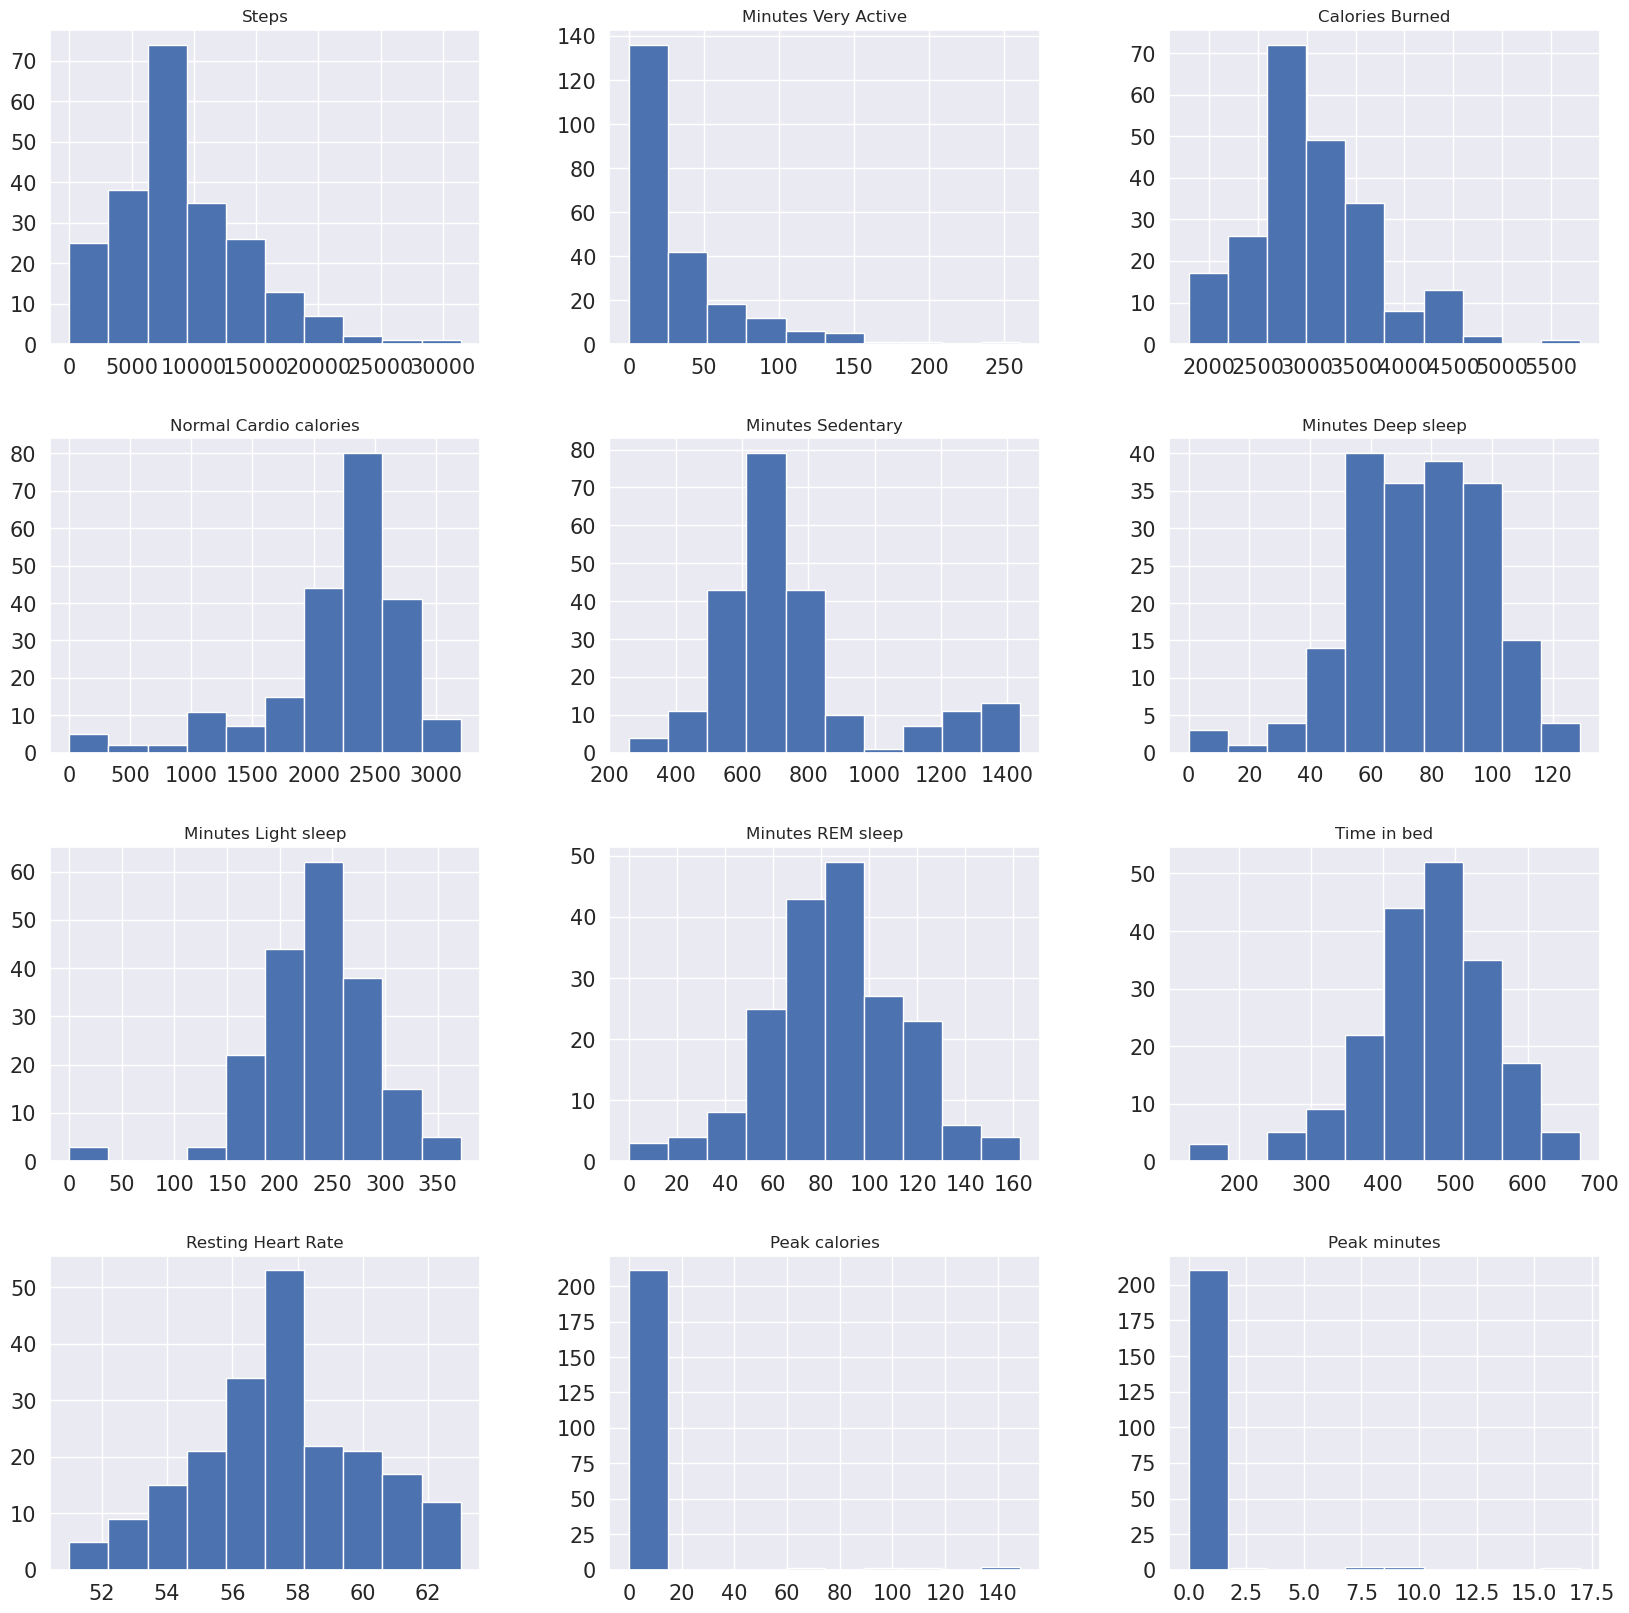

In [57]:
import warnings
warnings.filterwarnings('ignore')        
df1.hist(figsize=(20,20), bins = 10, xlabelsize=15, ylabelsize= 15)

As seen from the above plots, a few of the variables (Minutes Deep Sleep, Steps, Resting Heart Beat) follows a normal distribution. It would be interesting to carry out some form of hypothesis testing as well if the distributions behave the same on both weekdays and weekends; or there would be a significant difference between them.

### Scatter plots and Correlation Plots/Matrix:
Since most of the variables in our dataset are numerical, it would be interesting to plot scatter plots and see how the variables interact with one another.

Before moving on, let's add an extra column to our data, stating if it's the weekend/weekday.

In [58]:
df['Time of week'] = np.where((df['Day of Week'] == '6') | (df['Day of Week'] == '7'), 'Weekend', 'Weekday')
# df['Time of week'] = ['Weekend' if (x =='Sunday') | (x =='Saturday') else 'Weekday' for x in df['Day Name']] 

In [59]:
df['Time of week'].value_counts()

Time of week
Weekday    222
Name: count, dtype: int64

In [60]:
df['Time of week'] = df['Time of week'].astype('object')

Let's pick a subset of our original data and use pairplots.

In [61]:
pplot = ['Steps','Calories Burned','Minutes Sedentary','Minutes Deep sleep','Minutes REM sleep',\
         'Time in bed','Resting Heart Rate','Sleep Efficiency']

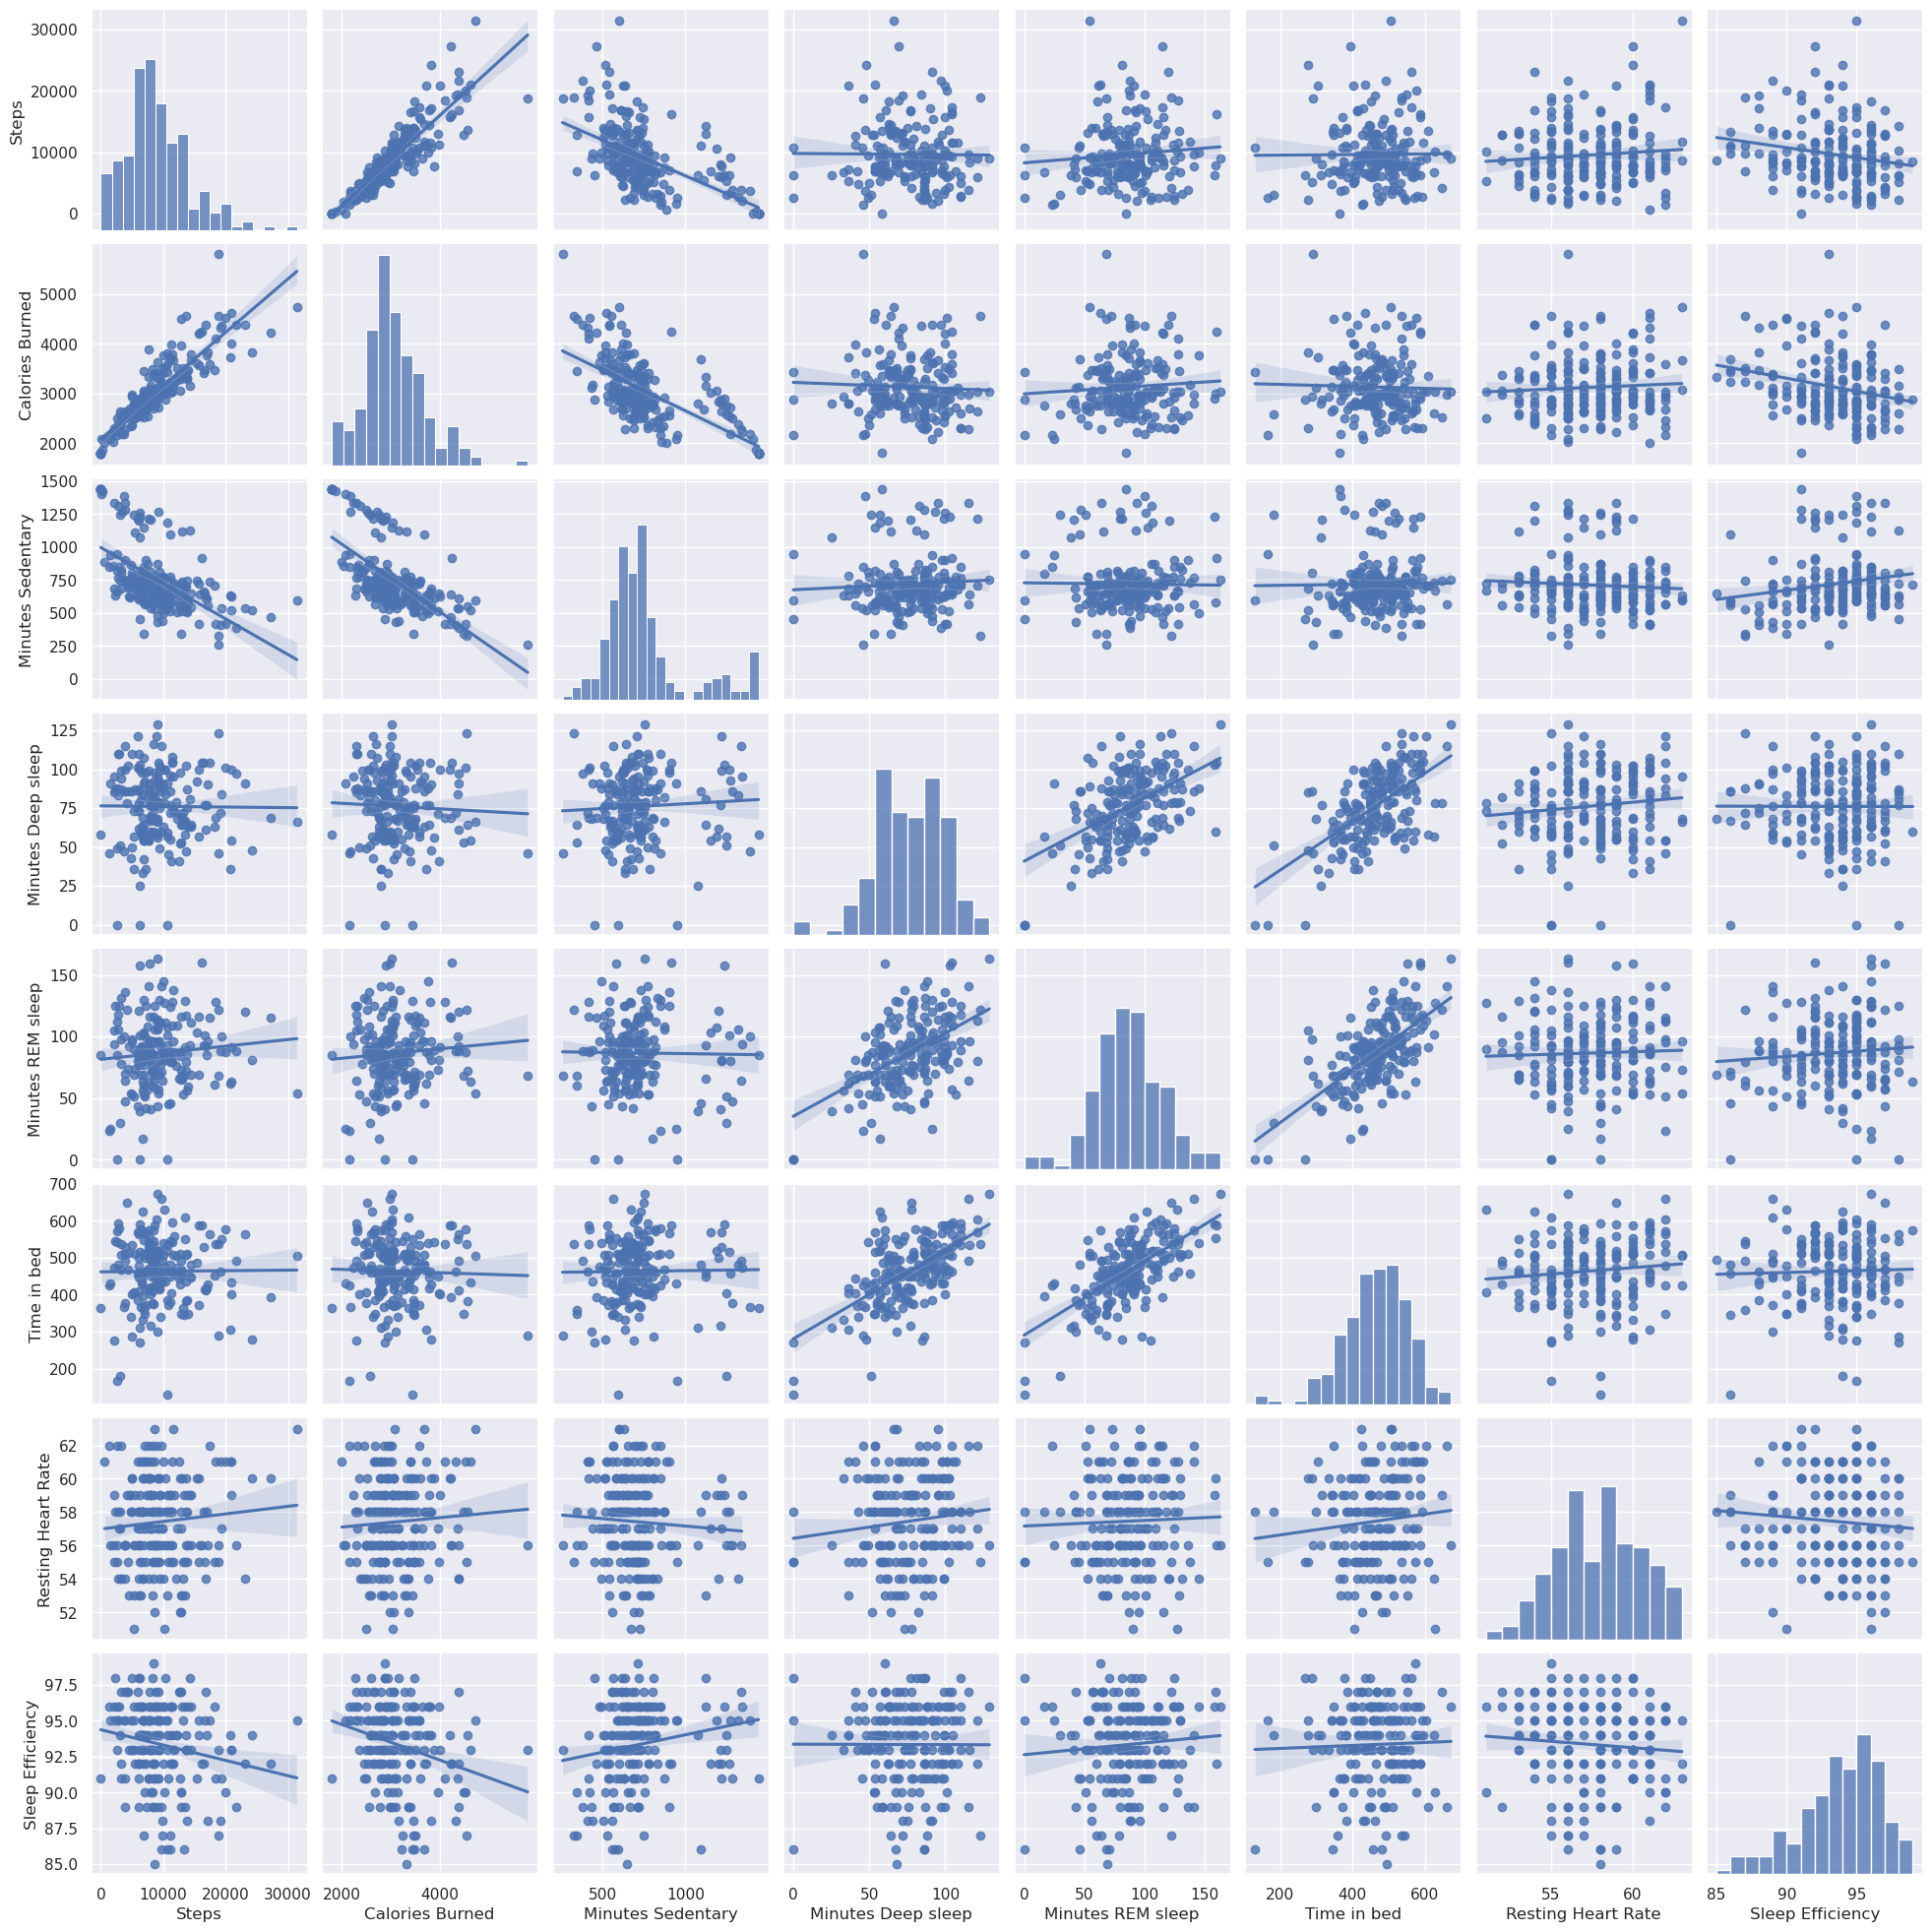

In [62]:
sns.set()
sns.pairplot(df[pplot], kind = 'reg')

Regression plots serve as a better tool because along with the scatter plots, we get a best fit line which shows the trend of the data points. Also, if we see that this trend line passes through majority of the points, we can assume that we can use this data for a good predictive model as well.

Some of the notable insights from the above plots are:

* Sleep efficiency is positively related to the amount of "Deep Sleep" followed by "REM Sleep". Interestingly, it is negatively related to "Time in bed". This is an indication that **more sleep doesn't necessarily promote better sleep.**

    
* Calories Burned is inversely related to my Resting Heart Beat. This means **the more I stay active, the more calories I burn, which ultimately results in a lower RHB.**

    
* RHB is highly correlated to 'Minutes Sedentary'. The irony here is that some people might feel that by staying sedentary, they keep their heart rate to a minimum level, which might mean their RHB will also stay low. But clearly, that is not the case here.

The next step is to use correlation and heatmaps:

In [63]:
df1.corr()

,Steps,Minutes Very Active,Calories Burned,Normal Cardio calories,Minutes Sedentary,Minutes Deep sleep,Minutes Light sleep,Minutes REM sleep,Time in bed,Resting Heart Rate,Peak calories,Peak minutes
Steps,1.00e+00,7.28e-01,8.86e-01,4.63e-01,-0.56,-8.67e-03,6.90e-03,0.09,8.44e-03,8.58e-02,2.74e-02,-0.01
Minutes Very Active,7.28e-01,1.00e+00,7.98e-01,2.94e-02,-0.37,-1.86e-02,-3.53e-02,0.09,-3.50e-02,5.93e-03,1.56e-01,0.08
Calories Burned,8.86e-01,7.98e-01,1.00e+00,3.91e-01,-0.65,-4.66e-02,-4.64e-02,0.08,-2.94e-02,6.30e-02,8.26e-03,-0.03
Normal Cardio calories,4.63e-01,2.94e-02,3.91e-01,1.00e+00,-0.69,-8.65e-03,1.02e-01,0.11,1.02e-01,-1.59e-01,-1.65e-01,-0.14
Minutes Sedentary,-5.63e-01,-3.66e-01,-6.46e-01,-6.94e-01,1.00,5.93e-02,5.49e-02,-0.01,1.48e-02,-6.73e-02,1.38e-01,0.12
Minutes Deep sleep,-8.67e-03,-1.86e-02,-4.66e-02,-8.65e-03,0.06,1.00e+00,2.90e-01,0.52,6.11e-01,1.14e-01,-4.76e-02,-0.06
Minutes Light sleep,6.90e-03,-3.53e-02,-4.64e-02,1.02e-01,0.05,2.90e-01,1.00e+00,0.41,7.57e-01,1.19e-01,-8.42e-02,-0.05
Minutes REM sleep,9.23e-02,9.07e-02,7.80e-02,1.10e-01,-0.01,5.24e-01,4.06e-01,1.00,6.54e-01,3.68e-02,1.18e-01,0.09
Time in bed,8.44e-03,-3.50e-02,-2.94e-02,1.02e-01,0.01,6.11e-01,7.57e-01,0.65,1.00e+00,1.03e-01,-4.42e-02,-0.04
Resting Heart Rate,8.58e-02,5.93e-03,6.30e-02,-1.59e-01,-0.07,1.14e-01,1.19e-01,0.04,1.03e-01,1.00e+00,-6.00e-02,-0.03


A correlation matrix allows one to see the relationship between different numerical variables at a glance. We can also find the correlation for a single variable of interest. For e.g:

In [64]:
print(df.corrwith(df['Sleep Efficiency']).sort_values(ascending = False).head(10))
print('---------------------------------------------------------------')
print(df.corrwith(df['Sleep Efficiency']).sort_values(ascending = False).tail(10))

ValueError: could not convert string to float: '2022-12-18T23:53:00.000'

Here, we are looking at the top 10 and bottom 10 variables affecting our Sleep Efficiency. 

Interestingly, good levels of REM and Deep Sleep seem to promote better Sleep Quality. Also, my sleep efficiency is better during weekdays as compared to weekends.

Last but not the least, heatmaps are a very useful way to carry out correlation analysis as well.

<Axes: >

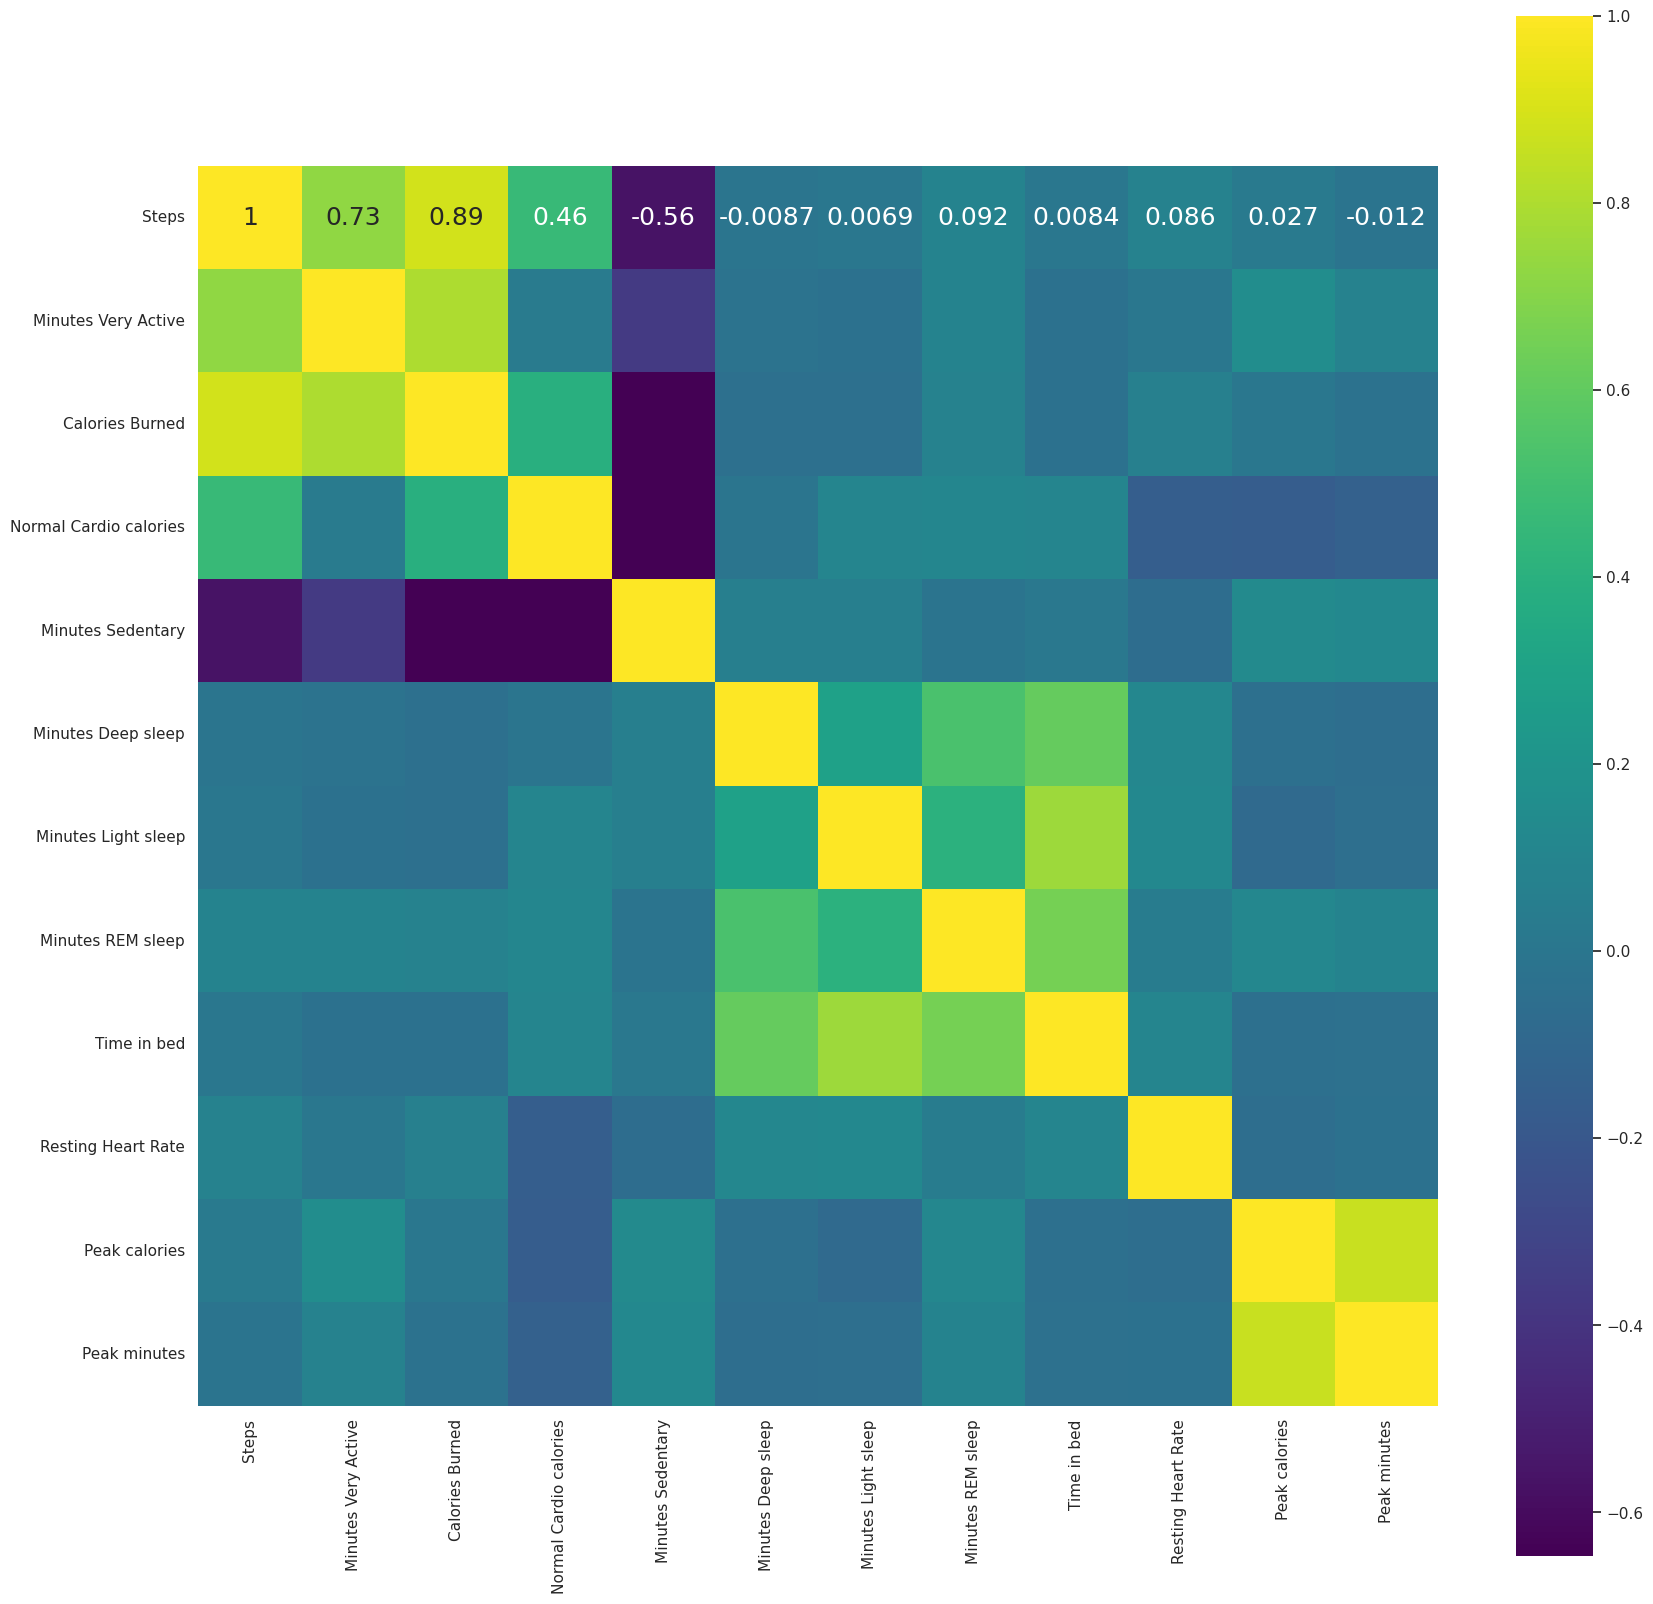

In [65]:
corr = df1.corr()
plt.figure(figsize = (20,20))

sns.heatmap(corr, annot= True, robust=True,\
            annot_kws= {"size" : 18},cmap='viridis',\
            square= True)

### Box-Plots
Box plots help us to combine both numerical and categorical variables and understand how they relate to each other. The best thing about using box plots is that you directly get an understanding of your data distribution (the mean, the spread, left/right skewed etc).In our case, we have 2 categorical variables :

Name of day

Weekend/ Weekday

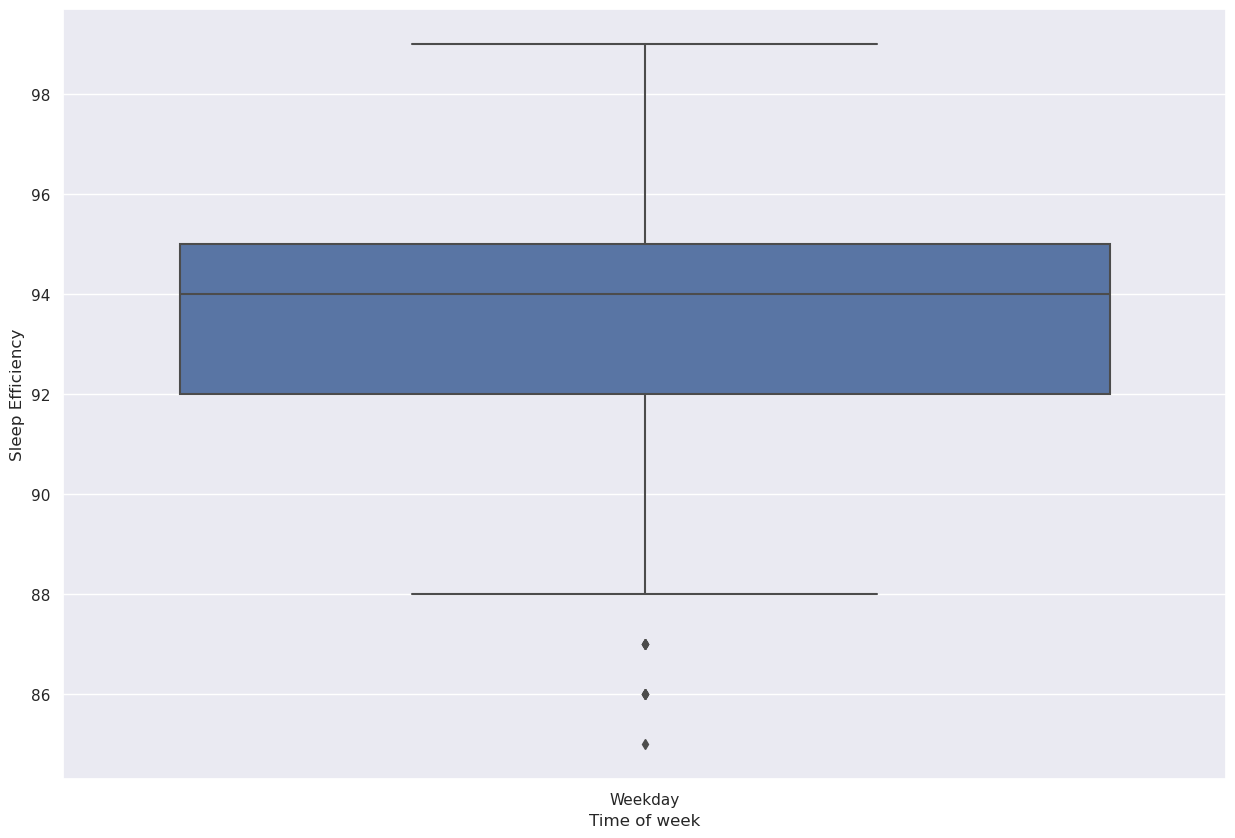

In [66]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Time of week', y = 'Sleep Efficiency', data = df)

Right away, we can see my sleep efficiency looks much better for weekdays as compared to weekends. Let's dig deeper into this and see this changes for every single day of the week.

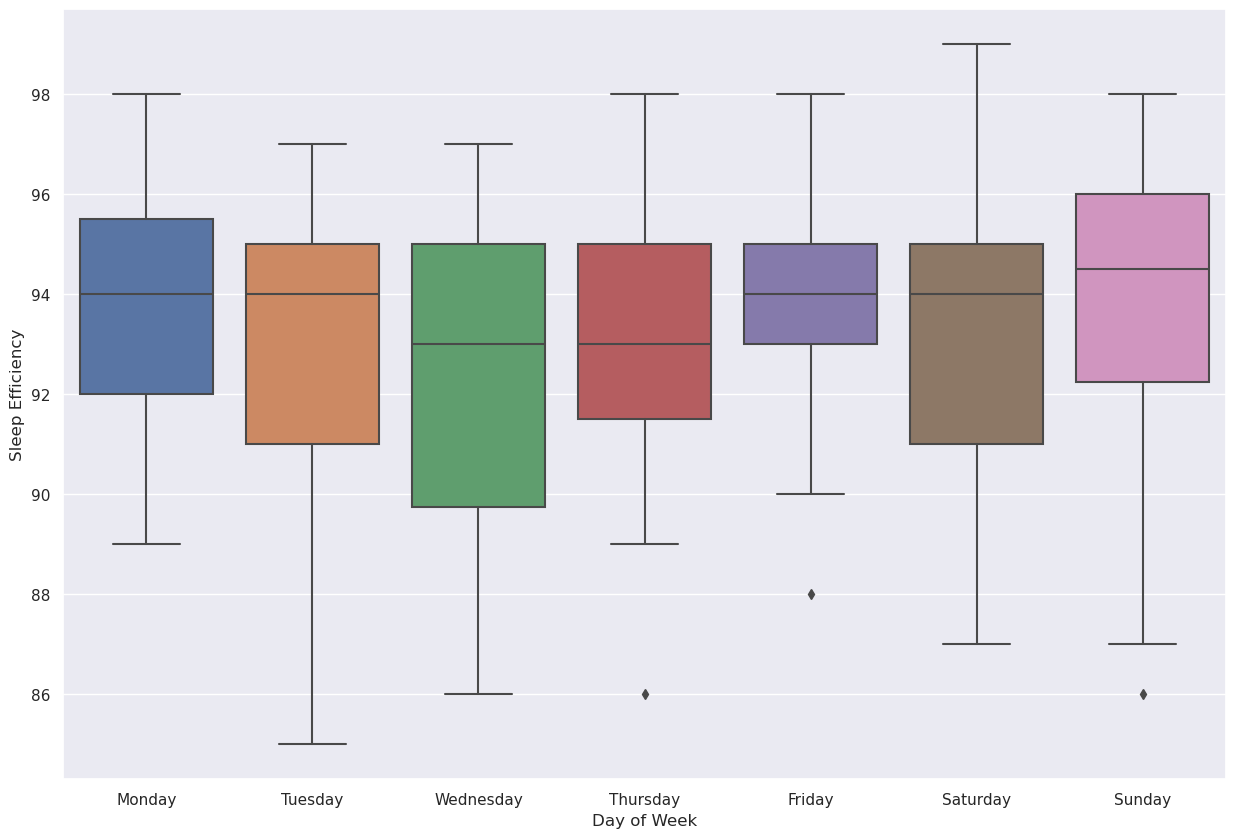

In [67]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day of Week', y = 'Sleep Efficiency', data = df)
# Define the labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the labels on the x-axis
box1.set_xticklabels(day_labels)

plt.show()

As expected, the middle whisker (mean value) is skewed more towards the lower whisker (25th percentile) for Sunday, while the overall spread is the highest for Saturday. This is clearly an indication that my sleep quality can be improved on the weekends.

Now let's look at my number of active minutes as well.

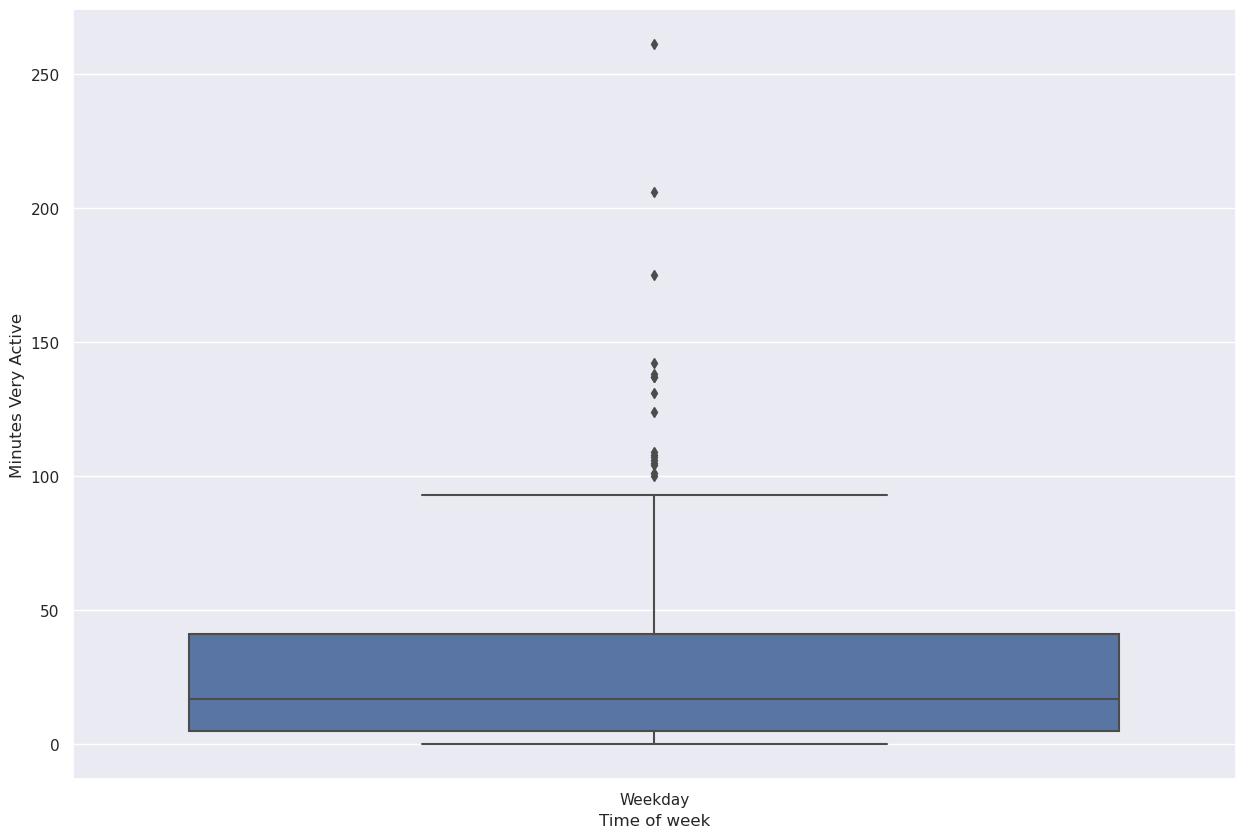

In [68]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Time of week', y = 'Minutes Very Active', data = df)

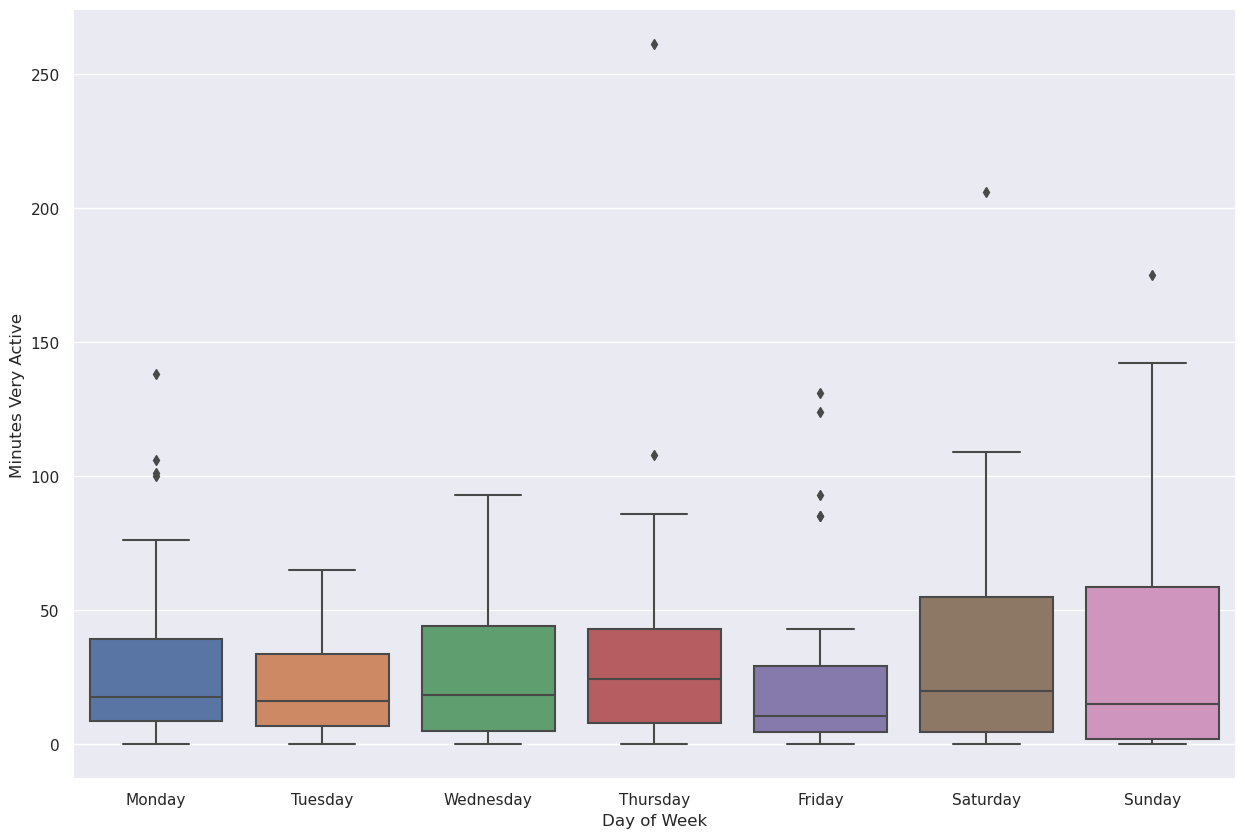

In [69]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day of Week', y = 'Minutes Very Active', data = df)

# Define the labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the labels on the x-axis
box1.set_xticklabels(day_labels)

plt.show()

Look at that sudden dip between active minutes on Saturday v/s Sunday.

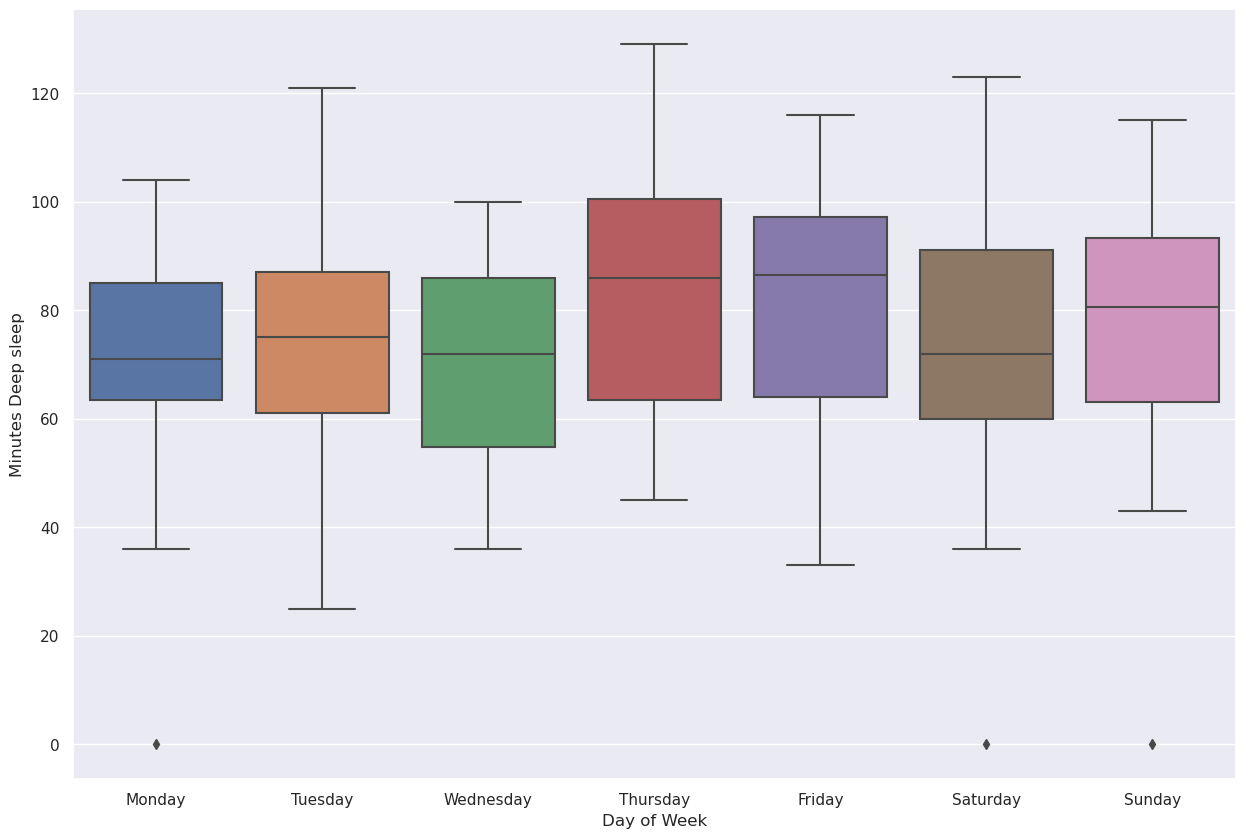

In [70]:
plt.figure(figsize = (15,10))
box1 = sns.boxplot(x = 'Day of Week', y = 'Minutes Deep sleep', data = df)

# Define the labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the labels on the x-axis
box1.set_xticklabels(day_labels)

plt.show()

### Line/Trend Chart:

Trend chart (as the name suggests), help us to look at the distribution of our variables over time.

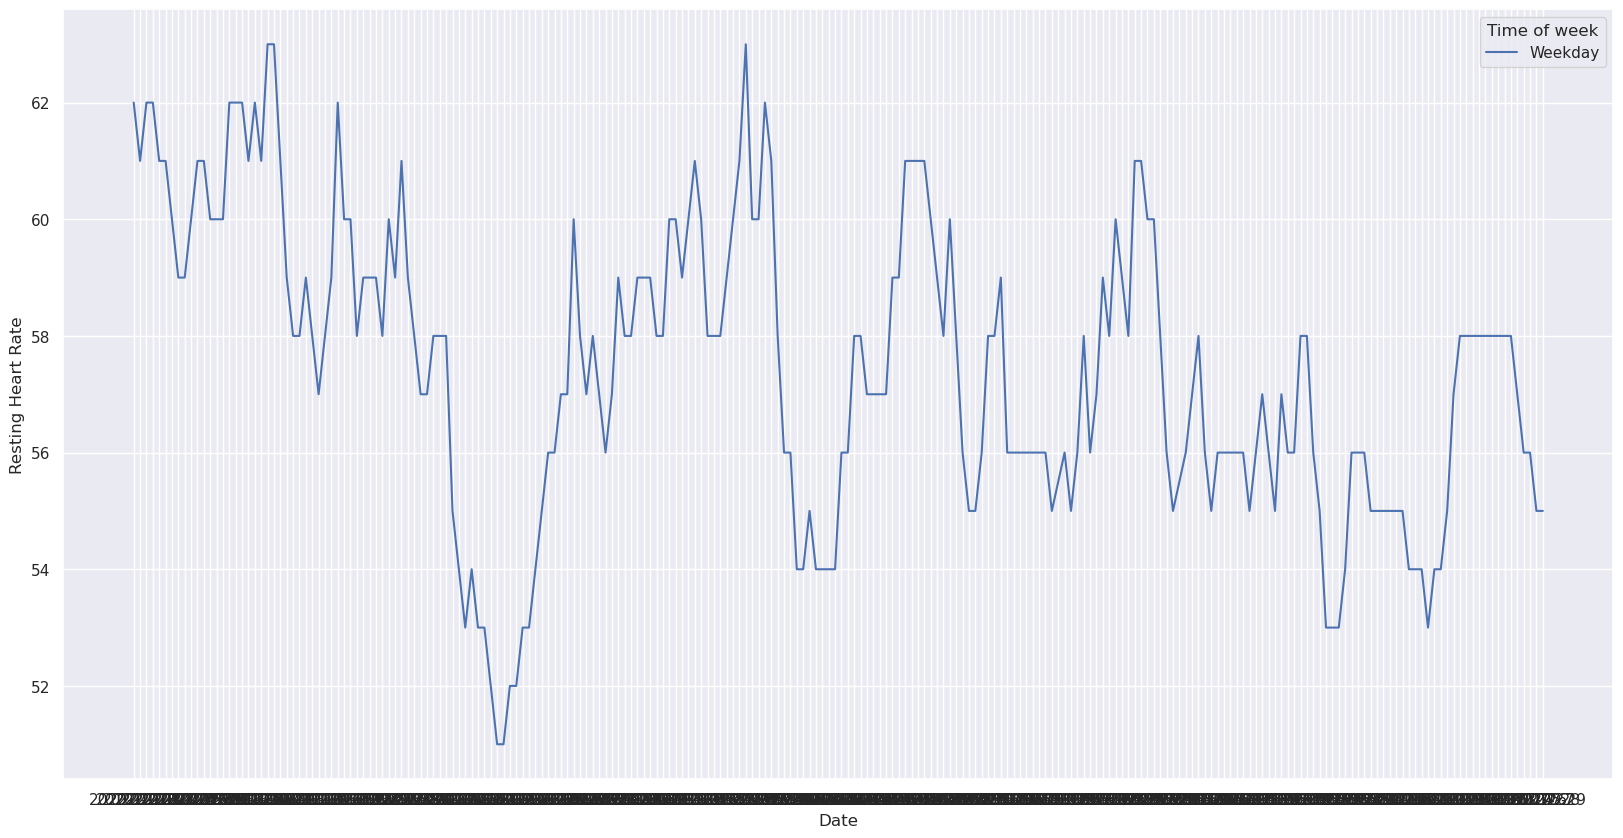

In [71]:
plt.figure(figsize = (20,10))
RHBtrend = sns.lineplot(x ='Date', y = 'Resting Heart Rate',\
                      hue="Time of week",\
                      data = df )

Quite an interesting trend here which shows my RHB gradually decreasing and then starting to spike up again since the last 3 weeks. It makes sense because I have been mostly indoors since the last 3 weeks as a precautionary measure against Coronavirus.

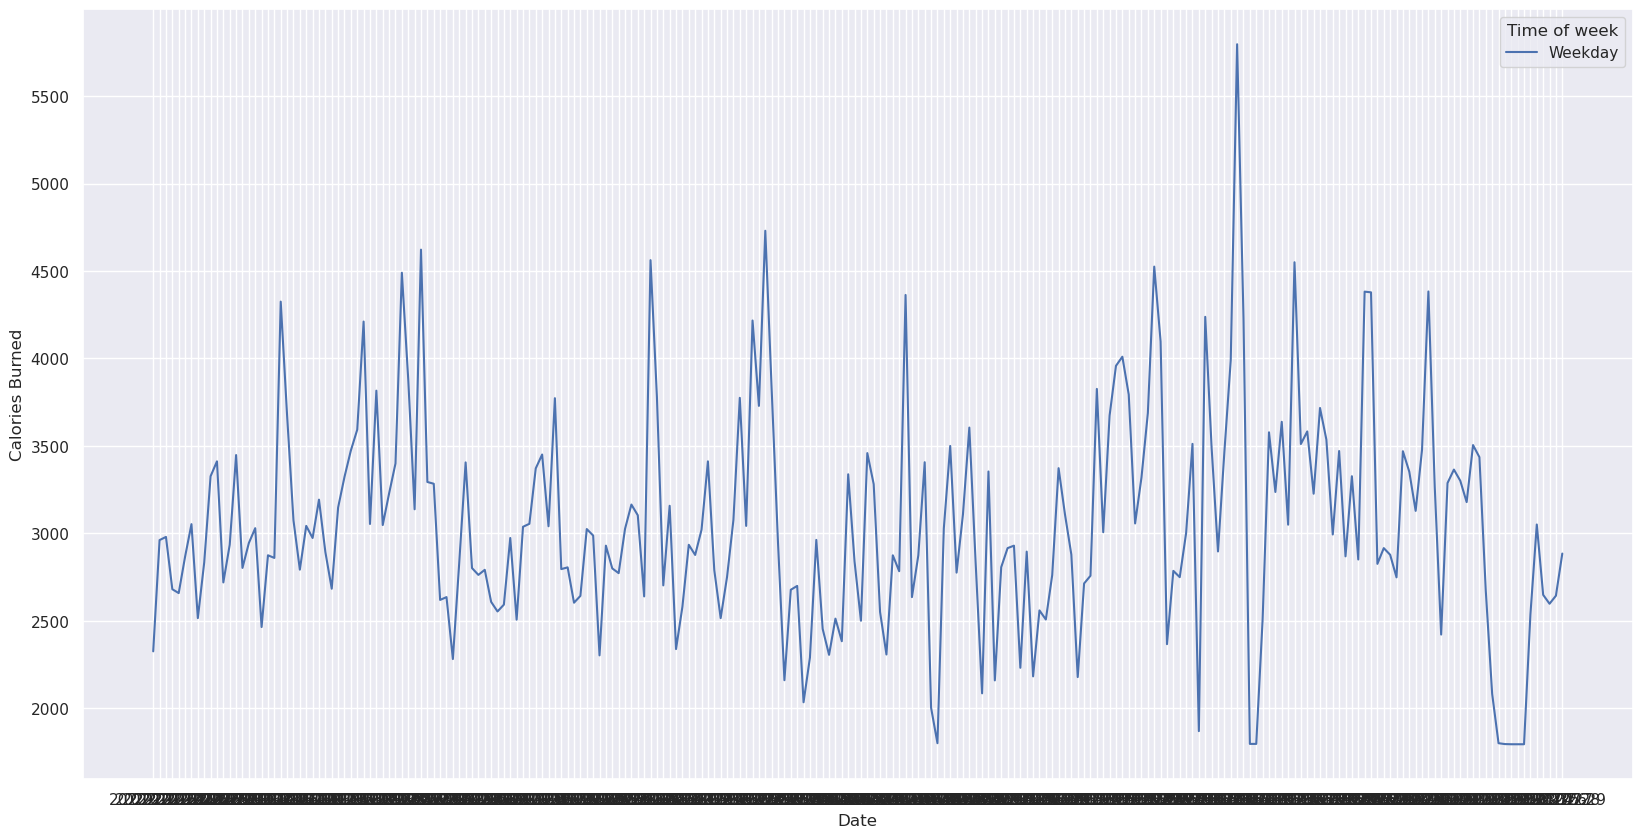

In [72]:
plt.figure(figsize = (20,10))
CalorieTrend = sns.lineplot(x ='Date', y = 'Calories Burned',\
                      hue="Time of week",\
                      data = df )

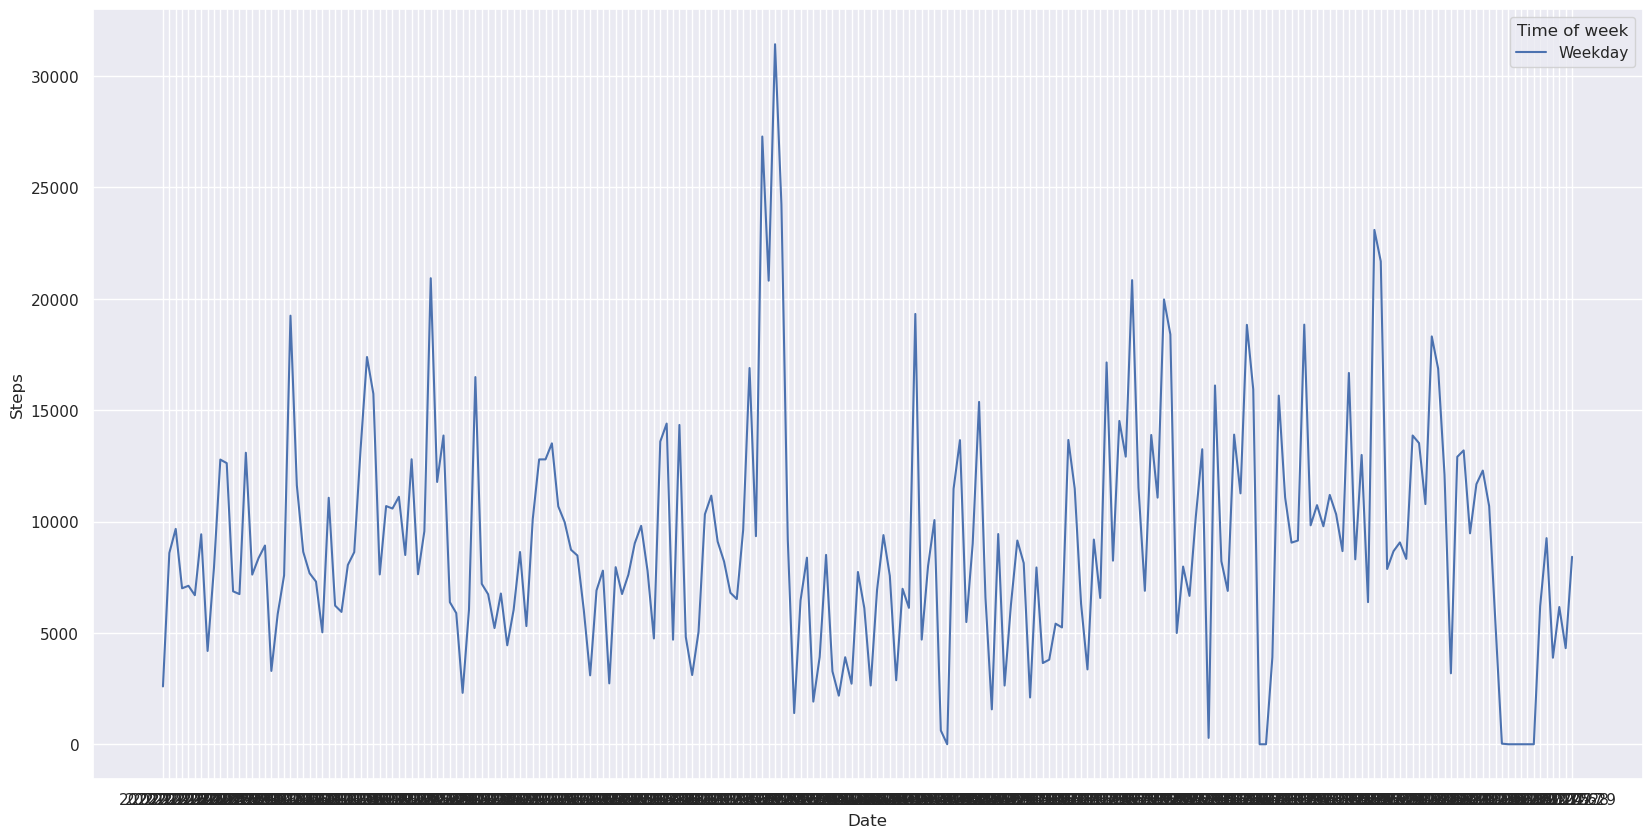

In [73]:
plt.figure(figsize = (20,10))
CalorieTrend = sns.lineplot(x ='Date', y = 'Steps',\
                      hue="Time of week",\
                      data = df )


Combining the trend charts for 'Calories Burned' and 'Steps', we see that both of them follows almost the same trend. Another interesting trend is that, whenever I have an active week, the weekend is not that active and vice versa.

### Bar Chart:

When it comes to understanding your data aggregated on a specific level and draw some form of conclusions, bar charts can be used.

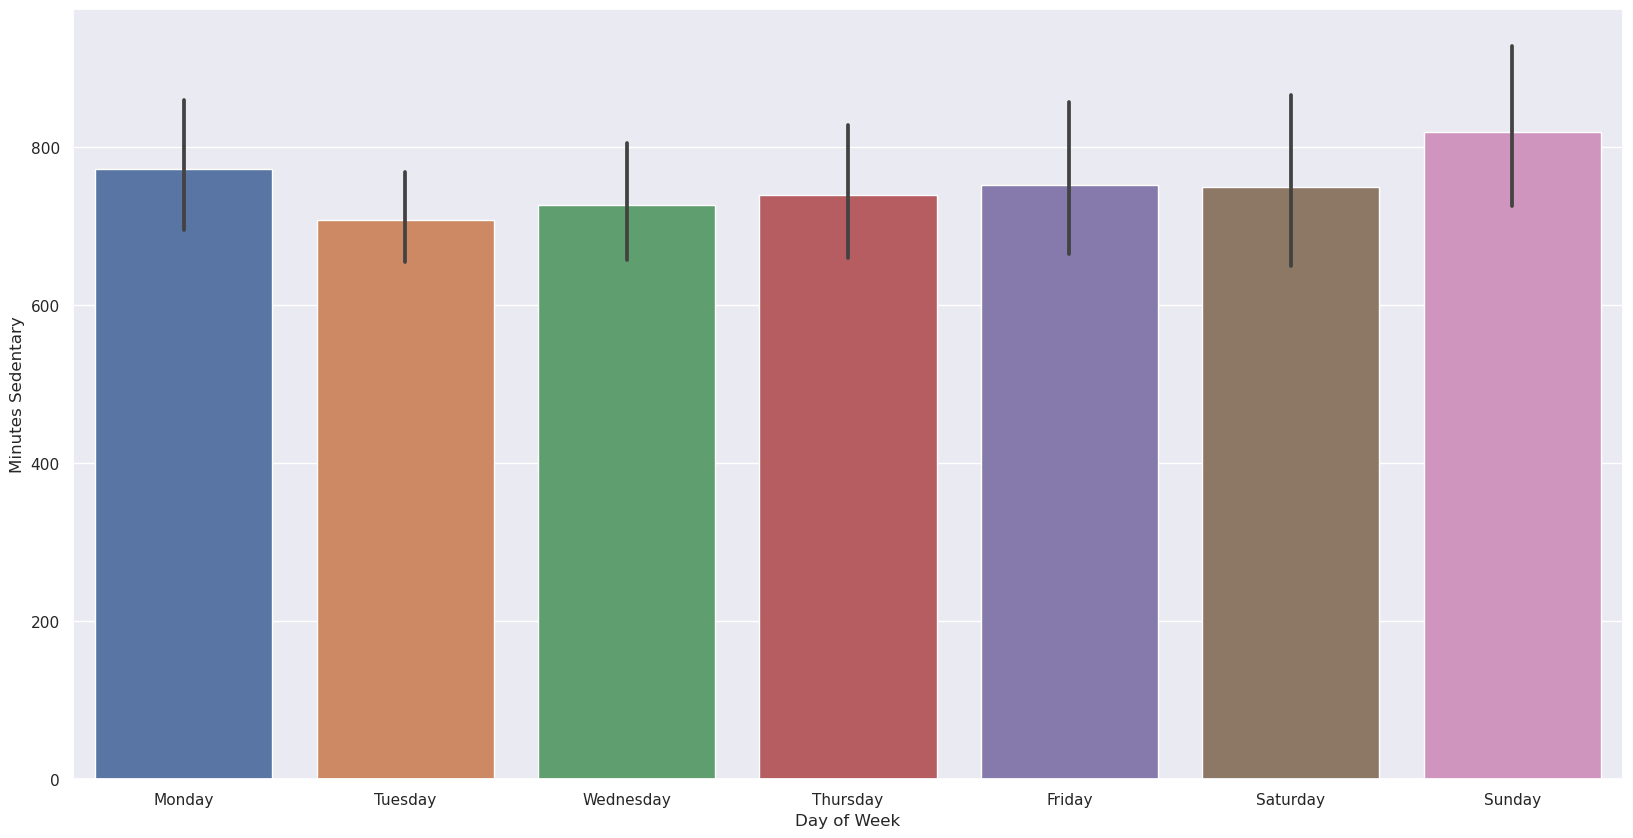

In [74]:
plt.figure(figsize = (20,10))
bp1 = sns.barplot(x ='Day of Week', y = 'Minutes Sedentary', data = df )

# Define the labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the labels on the x-axis
bp1.set_xticklabels(day_labels)

plt.show()

Look at that interesting trend where my average number of 'Minutes Sedentary' starts increasing from Friday onwards and continues to rise till Sunday. Once Sunday ends, we start seeing a steady dip that continues till Thursday and the cycle repeats.

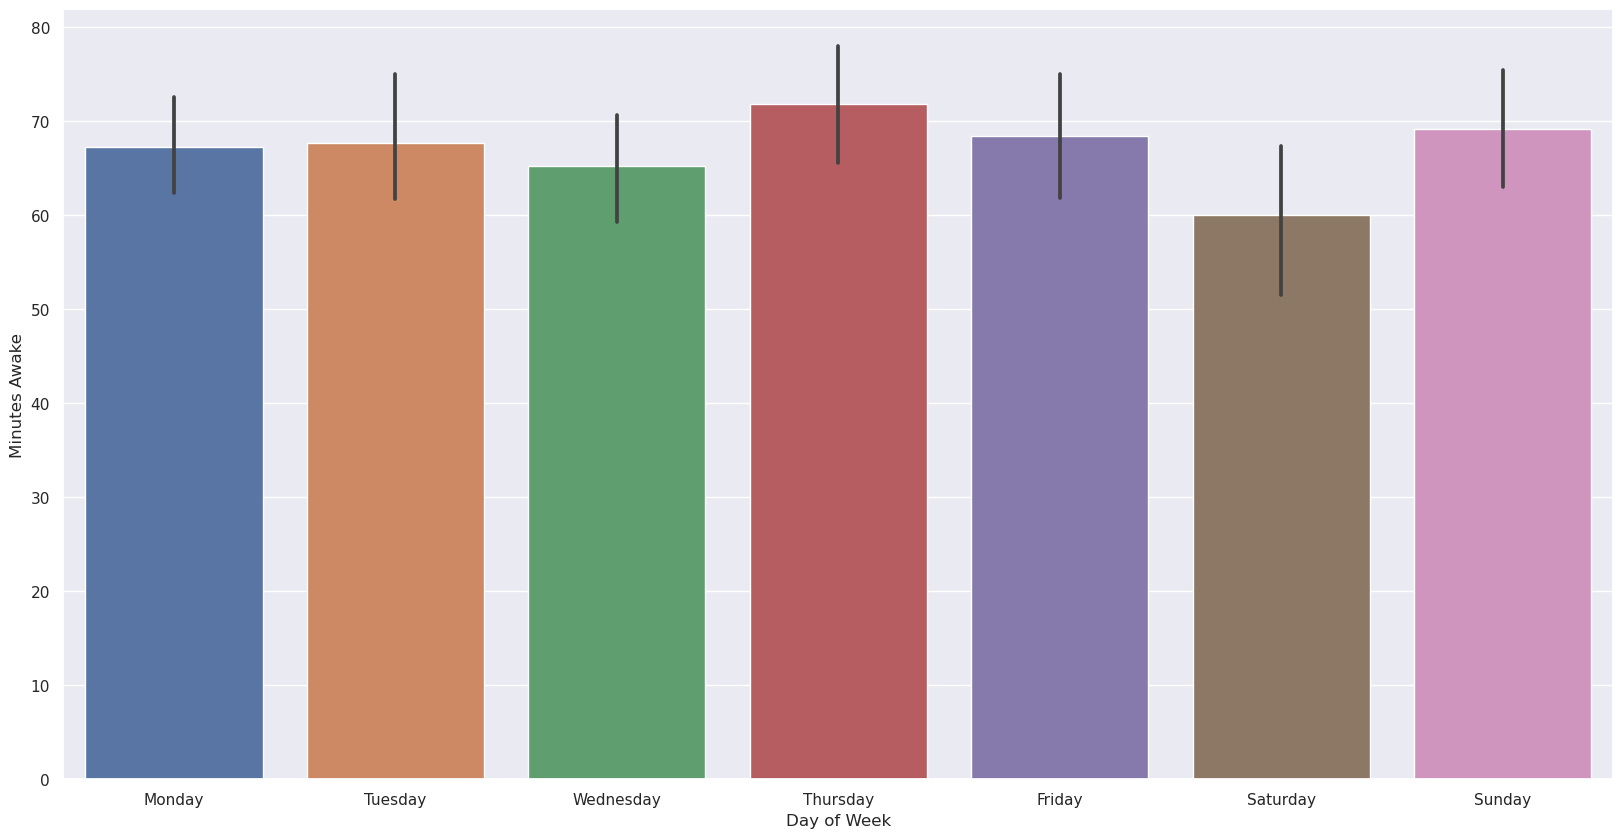

In [75]:

plt.figure(figsize = (20,10))
bp1 = sns.barplot(x ='Day of Week', y = 'Minutes Awake', data = df)
# Define the labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the labels on the x-axis
bp1.set_xticklabels(day_labels)

plt.show()


As seen, my sleep quality starts to decrease once weekend starts as my 'Minutes Awake' increases from Friday onwards to Sunday. For Monday, there is a sudden dip (a good sign) and it decreases again for Tuesday as well. But the interesting point to ponder upon is the sudden increase again for Wednesdays.

### Conclusion:
    
This ends my EDA of my fitbit data. It was a good way to dig deeper into my data and discover interesting insights, which will help me take care of health better. The next step is to make a dynamic dashboard in Microsoft Power BI, which will help me to slice and dice the data in real time and monitor my health. Also, the next phase in this project would be to add more data to the present data and see if any of the findings change. Lastly, Fitbit has also intraday level data (meaning I can extract some specific data, such as my heart beat, calories burnt etc. down to a very minute level). So I shall try to work with that data as well. 